In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [3]:
data=pd.read_csv("dataset/cleanData/cleandata.csv")

In [4]:
data.head()

,Unnamed: 0,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Year,Month,Date
0,0,1475229326,2016-09-29,23:55:26,1.21,48,0.46,59.0,177,5.62,06:13:00,18:13:00,2016,9,9
1,1,1475229023,2016-09-29,23:50:23,1.21,48,0.46,58.0,176,3.37,06:13:00,18:13:00,2016,9,9
2,2,1475228726,2016-09-29,23:45:26,1.23,48,0.46,57.0,158,3.37,06:13:00,18:13:00,2016,9,9
3,3,1475228421,2016-09-29,23:40:21,1.21,48,0.46,60.0,137,3.37,06:13:00,18:13:00,2016,9,9
4,4,1475228124,2016-09-29,23:35:24,1.17,48,0.46,62.0,104,5.62,06:13:00,18:13:00,2016,9,9


# Linear Regressor

In [5]:
feature=["Temperature","Pressure","Humidity","Speed","Month","Date","UNIXTime"]
X=data[feature]
y=data["Radiation"]

In [6]:
X.shape

(32686, 7)

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(26148, 7) (6538, 7) (26148,) (6538,)


In [22]:
# applying the linear regression model

from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
y_pred= reg.predict(X_test)

print('Train Score: ', reg.score(X_train, y_train))  
print('Test Score: ', reg.score(X_test, y_test)) 

Train Score:  0.5986616569794181
Test Score:  0.5868852850424385


In [23]:
 from sklearn.metrics import mean_squared_error, mean_absolute_error
mse=mean_squared_error(y_pred,y_test)
mae=mean_absolute_error(y_pred,y_test)
print("mean_squared_error:- ", mse)
print("mean_absolute_error:- ", mae)


mean_squared_error:-  40241.028798862106
mean_absolute_error:-  152.24339385058272


# Polynimial Regression

In [24]:
from sklearn.linear_model import LinearRegression  
#lin_regs= LinearRegression()  
#lin_regs.fit(X_train,y_train)  
from sklearn.preprocessing import PolynomialFeatures  
poly_regs= PolynomialFeatures(degree= 2)  
x_poly= poly_regs.fit_transform(X_train)  
lin_reg_2 =LinearRegression()  
lin_reg_2.fit(x_poly, y_train) 
x_poly_t= poly_regs.fit_transform(X_test)
y_predp= lin_reg_2.predict(x_poly_t)


msep=mean_squared_error(y_predp,y_test)
maep=mean_absolute_error(y_predp,y_test)
print("mean_squared_error:- ", msep)
print("mean_absolute_error:- ", maep)


mean_squared_error:-  34624.78578971333
mean_absolute_error:-  129.49389135161167


# RandomForestRegressor

In [25]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.datasets import make_regression
#X_train, y_train = make_regression(n_features=7, n_informative=1,random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=7, random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, random_state=0)

In [26]:
y_predr= regr.predict(X_test)

In [27]:
print('Train Score: ', reg.score(X_train, y_train))  
print('Test Score: ', reg.score(X_test, y_test)) 

Train Score:  0.5986616569794181
Test Score:  0.5868852850424385


In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mser=mean_squared_error(y_test,y_predr)
maer=mean_absolute_error(y_test,y_predr)
print("mean_squared_error:- ", mser)
print("mean_absolute_error:- ", maer)

mean_squared_error:-  22289.82820280287
mean_absolute_error:-  89.06778981978863


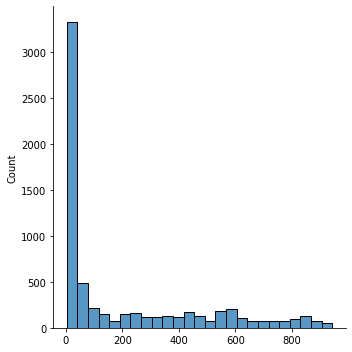

In [29]:
sns.displot((y_predr))

In [30]:
sse = np.sum((y_predr-y_test)**2)
sst=np.sum((y_test-y_test.mean())**2)
R_square=1-(sse/sst)
print("r2_squre for the polynomial regression", R_square)

r2_squre for the polynomial regression 0.7711724501259694


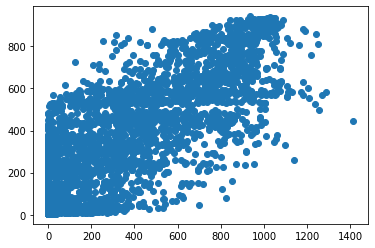

In [31]:
plt.scatter(y_test,y_predr)